# 드라이브 연동

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install Libraries

In [2]:
pip install opencv-python

In [3]:
pip install dlib

# Import Libraries & Set Parameters
데이터 : https://sites.google.com/site/achrafbenhamadou/-datasets/miracl-vc1

In [4]:
import dlib
import cv2
import os

# Some constants
RESULT_PATH = 'result path'       # The path that the result images will be saved
IMG_PATH = 'dataset path'      # Dataset path
LOG_PATH = 'log path'            # The path for the working log file
LIP_MARGIN = 0.3                # Marginal rate for lip-only image.
RESIZE = (64,64)                # Final image size
logfile = open(LOG_PATH,'w')
# Face detector and landmark detector
face_detector = dlib.get_frontal_face_detector()
landmark_detector = dlib.shape_predictor("your path of shape_predictor_68_face_landmarks.dat")

# Define Functions

In [6]:
def shape_to_list(shape):
    coords = []
    for i in range(0, 68):
        coords.append((shape.part(i).x, shape.part(i).y))

    return coords

def process_image(image_path):
    # Read image
    frame = cv2.imread(image_path)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert image into grayscale

    # Obtain face landmark information
    face_rects = face_detector(gray, 1)  # Detect face
    if len(face_rects) != 1:
        print("Invalid number of faces detected in:", image_path)
        logfile.write(image_path + " : Invalid number of faces detected \r\n")
        return

    rect = face_rects[0]  # Proper number of faces
    landmark = landmark_detector(gray, rect)  # Detect face landmarks
    landmark = shape_to_list(landmark)

    # Crop images
    lip_landmark = landmark[48:68]  # Landmark corresponding to lip
    lip_x = sorted(lip_landmark, key=lambda pointx: pointx[0])  # Lip landmark sorted for determining lip region
    lip_y = sorted(lip_landmark, key=lambda pointy: pointy[1])
    x_add = int((-lip_x[0][0] + lip_x[-1][0]) * LIP_MARGIN)  # Determine Margins for lip-only image
    y_add = int((-lip_y[0][1] + lip_y[-1][1]) * LIP_MARGIN)
    crop_pos = (lip_x[0][0] - x_add, lip_x[-1][0] + x_add, lip_y[0][1] - y_add, lip_y[-1][1] + y_add)  # Crop image
    cropped = frame[crop_pos[2]:crop_pos[3], crop_pos[0]:crop_pos[1]]
    cropped = cv2.resize(cropped, (RESIZE[0], RESIZE[1]), interpolation=cv2.INTER_CUBIC)  # Resize

    # Save result
    filename = os.path.basename(image_path)
    result_path = os.path.join(RESULT_PATH, filename)
    cv2.imwrite(result_path, cropped)  # Write lip image
    print("Processed:", image_path)


# Applying

In [ ]:
# Process all images in the directory
for filename in os.listdir(IMG_PATH):
    if filename.endswith('.jpg'):
        image_path = os.path.join(IMG_PATH, filename)
        process_image(image_path)

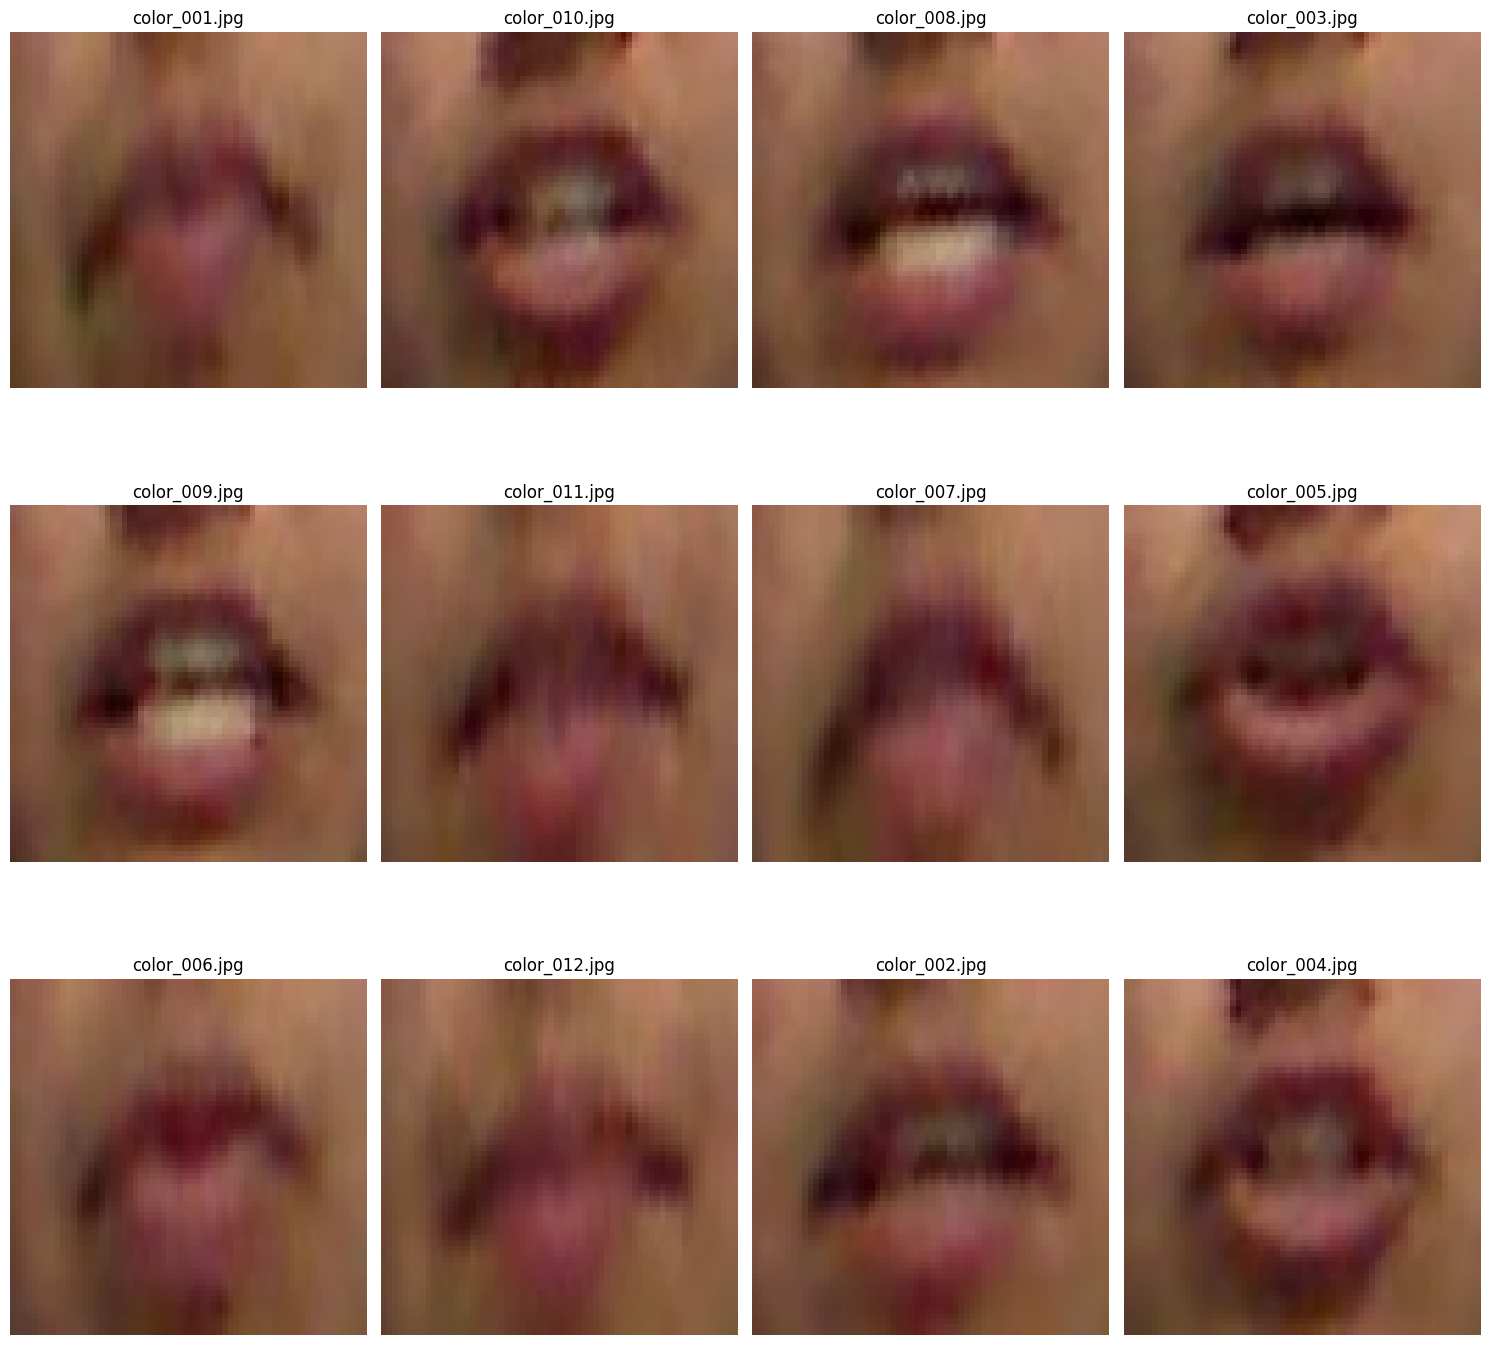

In [14]:
import cv2
import os
import matplotlib.pyplot as plt

# RESULT_PATH 폴더 내의 모든 파일을 가져옵니다.
file_list = os.listdir(RESULT_PATH)

# jpg 파일만 필터링하여 가져옵니다.
jpg_files = [file for file in file_list if file.endswith('.jpg')]

# 각 jpg 파일을 순회하면서 imshow 합니다.
num_cols = 4  # 한 행에 표시할 이미지 수
num_images = len(jpg_files)
num_rows = (num_images + num_cols - 1) // num_cols  # 올림을 적용하여 행 수 계산

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for idx, jpg_file in enumerate(jpg_files):
    # 파일 경로를 생성합니다.
    file_path = os.path.join(RESULT_PATH, jpg_file)

    # 이미지를 읽어옵니다.
    image = cv2.imread(file_path)

    # 이미지가 존재하는 경우에만 imshow 합니다.
    if image is not None:
        row = idx // num_cols
        col = idx % num_cols
        ax = axes[row, col]

        # 이미지를 표시합니다.
        ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax.set_title(jpg_file)
        ax.axis('off')  # 축을 제거합니다.

# 빈 서브플롯을 숨깁니다.
for idx in range(num_images, num_rows * num_cols):
    row = idx // num_cols
    col = idx % num_cols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()
